In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dataset=pd.read_csv("Preprocessed_stud_score.csv")

In [4]:
dataset

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
0,8.0,8.8,72.1,45,30.2
1,1.3,8.6,60.7,55,25.0
2,4.0,8.2,73.7,86,35.8
3,3.5,4.8,95.1,66,34.0
4,9.1,6.4,89.8,71,40.3
...,...,...,...,...,...
195,10.5,5.4,94.0,87,42.7
196,7.1,6.1,85.1,92,40.4
197,1.6,6.9,63.8,76,28.2
198,12.0,7.3,50.5,58,42.0


In [5]:
def quanqual(dataset):
    quan = []
    qual = []
    for columnname in dataset.columns:
        print(columnname)
        if dataset[columnname].dtype == 'O':  # 'O' means object (usually categorical/qualitative)
            qual.append(columnname)
        else:
            quan.append(columnname)
    return quan, qual  # moved return outside the loop


In [6]:
quanqual(dataset)

hours_studied
sleep_hours
attendance_percent
previous_scores
exam_score


(['hours_studied',
  'sleep_hours',
  'attendance_percent',
  'previous_scores',
  'exam_score'],
 [])

In [7]:
quan,qual=quanqual(dataset)

hours_studied
sleep_hours
attendance_percent
previous_scores
exam_score


In [8]:
quan

['hours_studied',
 'sleep_hours',
 'attendance_percent',
 'previous_scores',
 'exam_score']

In [9]:
# Initialize descriptive table with required indices
import pandas as pd

rows = ['Mean','Median','Mode','Q1-25%','Q2-50%','Q3-75%','Q4-100%',
        'IQR','Min','Max','Kurtosis','Skew','Lesser','Greater','Var','Std']

descriptive = pd.DataFrame(index=rows, columns=quan)


In [10]:
#Finding Outliers
Lesser=[]
Greater=[]
for columnname in quan:
    if(descriptive[columnname]['Min']<descriptive[columnname]['Lesser']):
       Lesser.append(columnname)
    if(descriptive[columnname]['Max']>descriptive[columnname]['Greater']):
       Greater.append(columnname)

In [11]:
import pandas as pd

def Univariate(dataset, quan):
    # Initialize descriptive table
    rows = ['Mean','Median','Mode','Q1-25%','Q2-50%','Q3-75%','Q4-100%',
            'IQR','Min','Max','Kurtosis','Skew','Lesser','Greater','Var','Std']
    descriptive = pd.DataFrame(index=rows, columns=quan)

    for columnname in quan:
        # Descriptive stats
        descriptive.loc['Mean', columnname] = dataset[columnname].mean()
        descriptive.loc['Median', columnname] = dataset[columnname].median()
        descriptive.loc['Mode', columnname] = dataset[columnname].mode()[0]

        q1 = dataset[columnname].quantile(0.25)
        q2 = dataset[columnname].quantile(0.50)
        q3 = dataset[columnname].quantile(0.75)
        q4 = dataset[columnname].quantile(1.00)

        descriptive.loc['Q1-25%', columnname] = q1
        descriptive.loc['Q2-50%', columnname] = q2
        descriptive.loc['Q3-75%', columnname] = q3
        descriptive.loc['Q4-100%', columnname] = q4

        iqr = q3 - q1
        descriptive.loc['IQR', columnname] = iqr
        descriptive.loc['Min', columnname] = dataset[columnname].min()
        descriptive.loc['Max', columnname] = dataset[columnname].max()
        descriptive.loc['Kurtosis', columnname] = dataset[columnname].kurtosis()
        descriptive.loc['Skew', columnname] = dataset[columnname].skew()

        # Outlier boundaries
        descriptive.loc['Lesser', columnname] = q1 - 1.5 * iqr
        descriptive.loc['Greater', columnname] = q3 + 1.5 * iqr

        # Variance & Std Dev
        descriptive.loc['Var', columnname] = dataset[columnname].var()
        descriptive.loc['Std', columnname] = dataset[columnname].std()

    return descriptive


In [12]:
descriptive=Univariate(dataset, quan)
descriptive

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
Mean,6.3255,6.622,74.83,66.8,33.955
Median,6.15,6.7,75.25,67.5,34.05
Mode,3.9,5.5,92.5,58,36.1
Q1-25%,3.5,5.3,62.2,54.0,29.5
Q2-50%,6.15,6.7,75.25,67.5,34.05
Q3-75%,9.0,8.025,87.425,80.0,38.75
Q4-100%,12.0,9.0,100.0,95.0,51.3
IQR,5.5,2.725,25.225,26.0,9.25
Min,1.0,4.0,50.3,40,17.1
Max,12.0,9.0,100.0,95,51.3


In [13]:
dataset.cov()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
hours_studied,10.415578,0.376220,-1.439965,3.492060,17.020198
sleep_hours,0.376220,2.241423,0.012201,-4.555377,1.913256
attendance_percent,-1.439965,0.012201,203.059799,11.597487,21.837789
previous_scores,3.492060,-4.555377,11.597487,245.356784,45.848241
exam_score,17.020198,1.913256,21.837789,45.848241,46.097965


In [14]:
dataset.corr()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
hours_studied,1.000000,0.077864,-0.031311,0.069078,0.776751
sleep_hours,0.077864,1.000000,0.000572,-0.194251,0.188222
attendance_percent,-0.031311,0.000572,1.000000,0.051958,0.225713
previous_scores,0.069078,-0.194251,0.051958,1.000000,0.431105
exam_score,0.776751,0.188222,0.225713,0.431105,1.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset=pd.read_csv("Preprocessed_stud_score.csv")

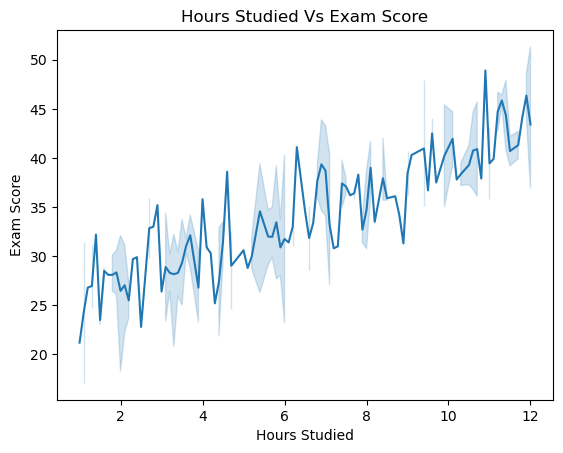

In [17]:
sns.lineplot(x="hours_studied", y="exam_score",data=dataset)
plt.title("Hours Studied Vs Exam Score")
plt.xlabel("Hours Studied")
plt.ylabel("Exam Score")
plt.show()

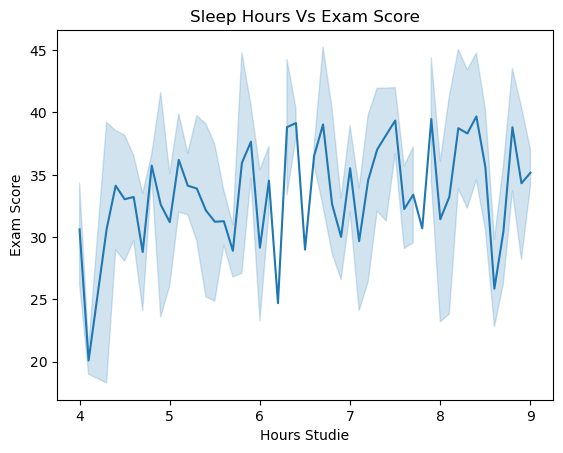

In [18]:
sns.lineplot(x="sleep_hours", y="exam_score",data=dataset)
plt.title("Sleep Hours Vs Exam Score")
plt.xlabel("Hours Studie")
plt.ylabel("Exam Score")
plt.show()

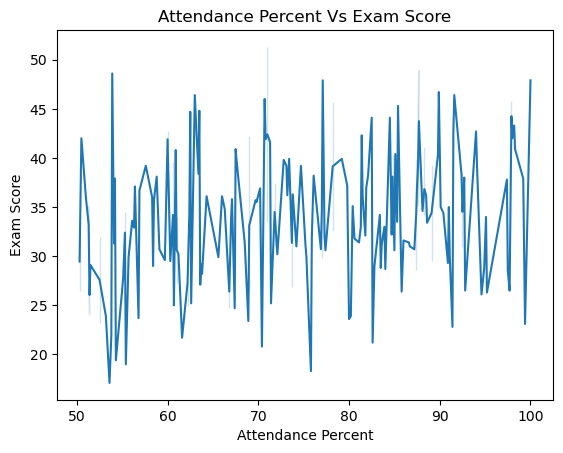

In [21]:
sns.lineplot(x="attendance_percent", y="exam_score",data=dataset)
plt.title("Attendance Percent Vs Exam Score")
plt.xlabel("Attendance Percent")
plt.ylabel("Exam Score")
plt.show()

<Axes: >

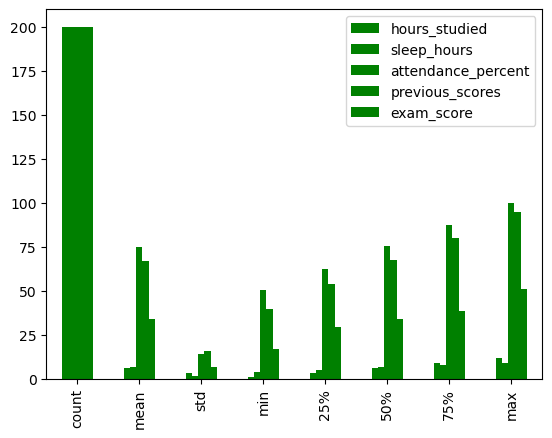

In [23]:
dataset.describe().plot(kind='bar',color='green')